## Understanding the problem

We have a time dynamical system whose state is described by two variables, $x$ and $v$.

The question asks how we can approximate these time dynamical systems using a regression tree when the data is in the form
$$
((x_k, v_k), (x_{k+1}, v_{k+1}))
$$

We could use a single tree to make predictions for the next state, but we would get more accurate results if we used multiple regression trees each with a limited height?

## Code for task 4

In [1]:
from task1 import *

# generating data
T = np.arange(0, 20)

# initial state
x_k = np.array([0.5, 1.5])

# creating an array of data
# shape: (number of time steps (rows), number of entries in each row, dimension of each column (previous state and next state))
X = np.zeros((T.size, 2, 2))

for t in T:
    X[t, 0, :] = x_k
    # creating next state
    X[t, 1, 0] = 0.9*x_k[0] - 0.2*x_k[1]
    X[t, 1, 1] = 0.2*x_k[0] + 0.9*x_k[1]
    x_k = X[t, 1, :]

y = X[:, 1]
X = X[:, 0]
X.shape

(20, 2)

In [2]:
print(y[0:2])
np.mean(y[0:2], axis=0)

[[ 0.15   1.45 ]
 [-0.155  1.335]]


array([-0.0025,  1.3925])

In [3]:
model = RegressionTree()
model.fit(X[:, 0], y[:, 0])
model.decision_path(X[10])
print(y[10])

x[0] < -0.31973391403185003
x[0] < -0.5636064712650002
x[0] >= -0.6714284655500002
x == -0.7343850000000003
[-0.56360647 -0.31734186]


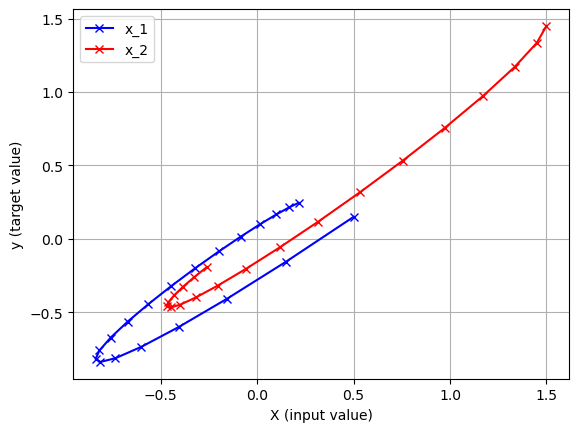

In [4]:
# plotting the correct outputs
import matplotlib.pyplot as plt

plt.plot(X[:, 0], y[:, 0], '-xb')
plt.plot(X[:, 1], y[:, 1], '-xr')
plt.xlabel('X (input value)')
plt.ylabel('y (target value)')
plt.legend(['x_1', 'x_2'])
plt.grid(True)
plt.show()

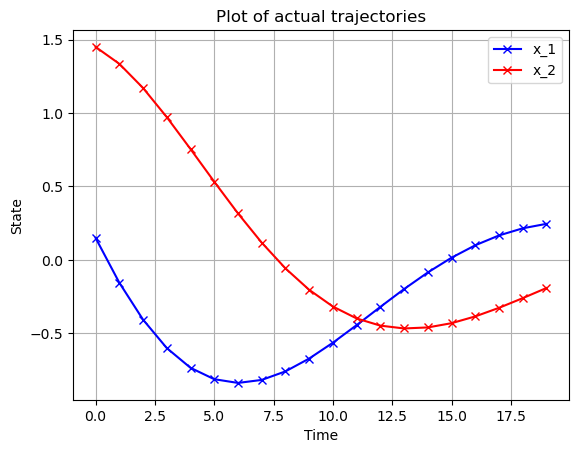

In [5]:
# trajectory of each variable vs. time
plt.plot(T, y[:, 0], '-xb', label="x_1")
plt.plot(T, y[:, 1], '-xr', label="x_2")
plt.xlabel('Time')
plt.ylabel('State')
plt.title('Plot of actual trajectories')
plt.legend(['x_1', 'x_2'])
plt.grid(True)
plt.show()

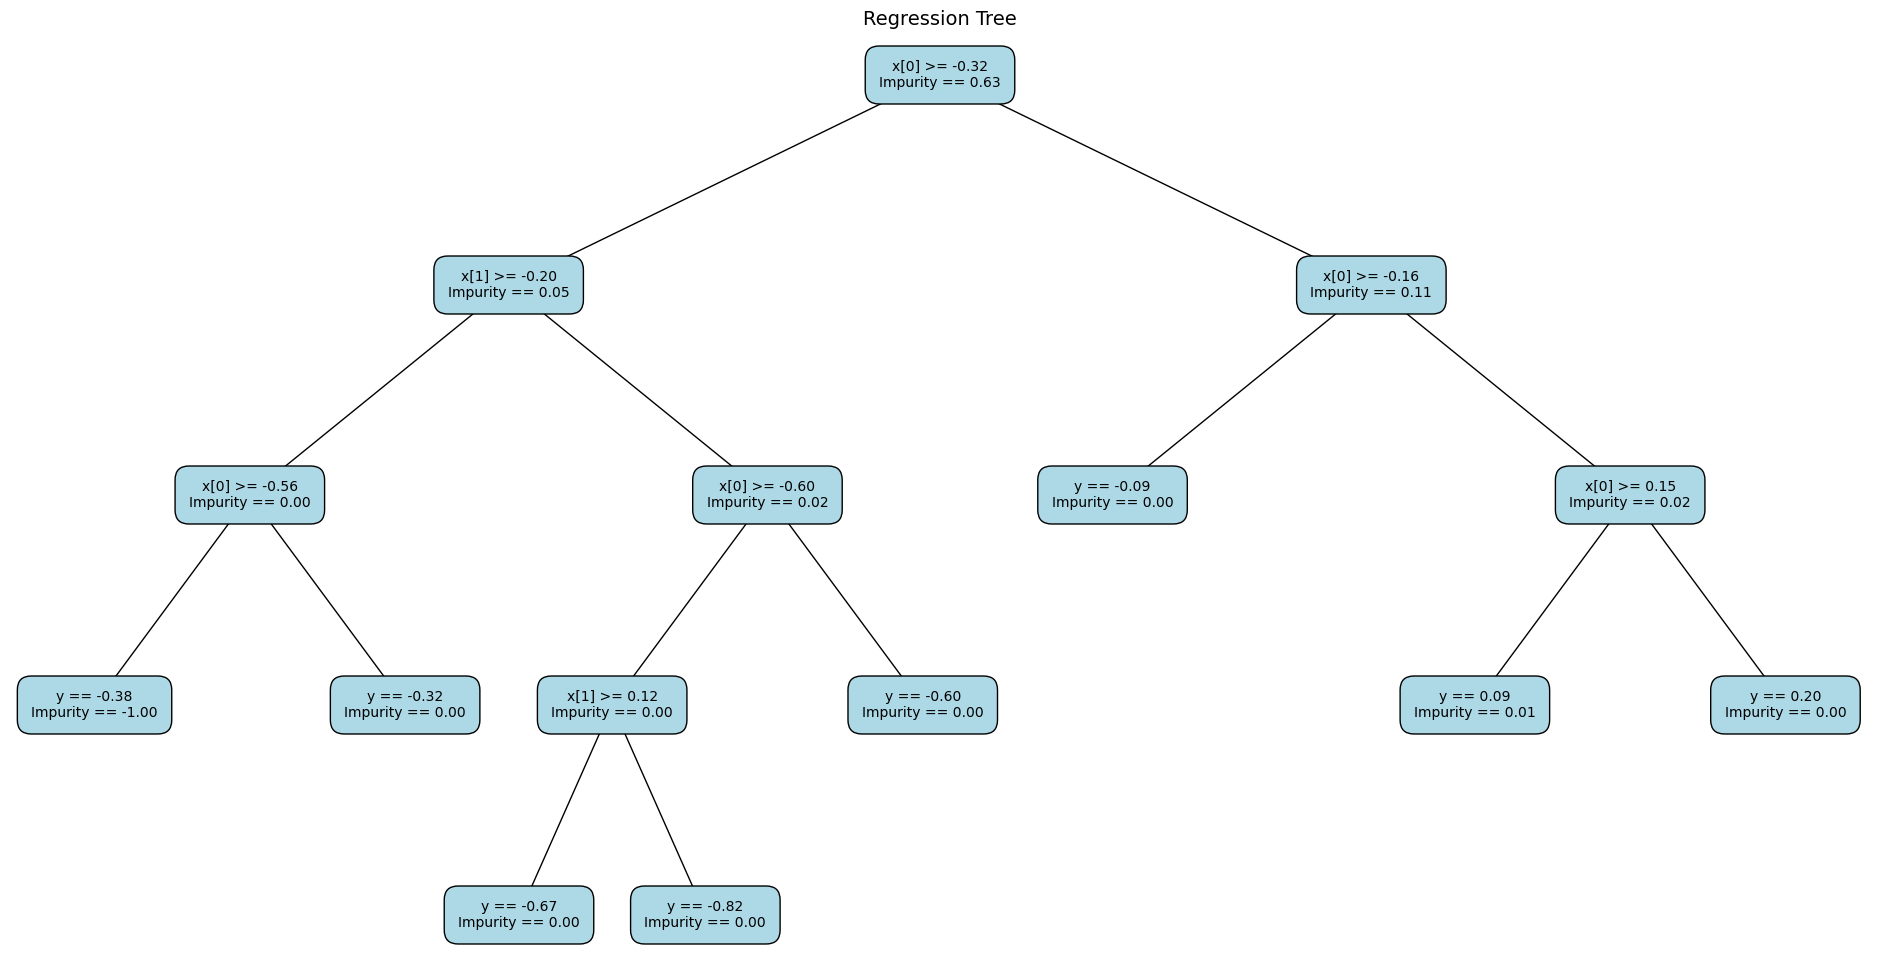

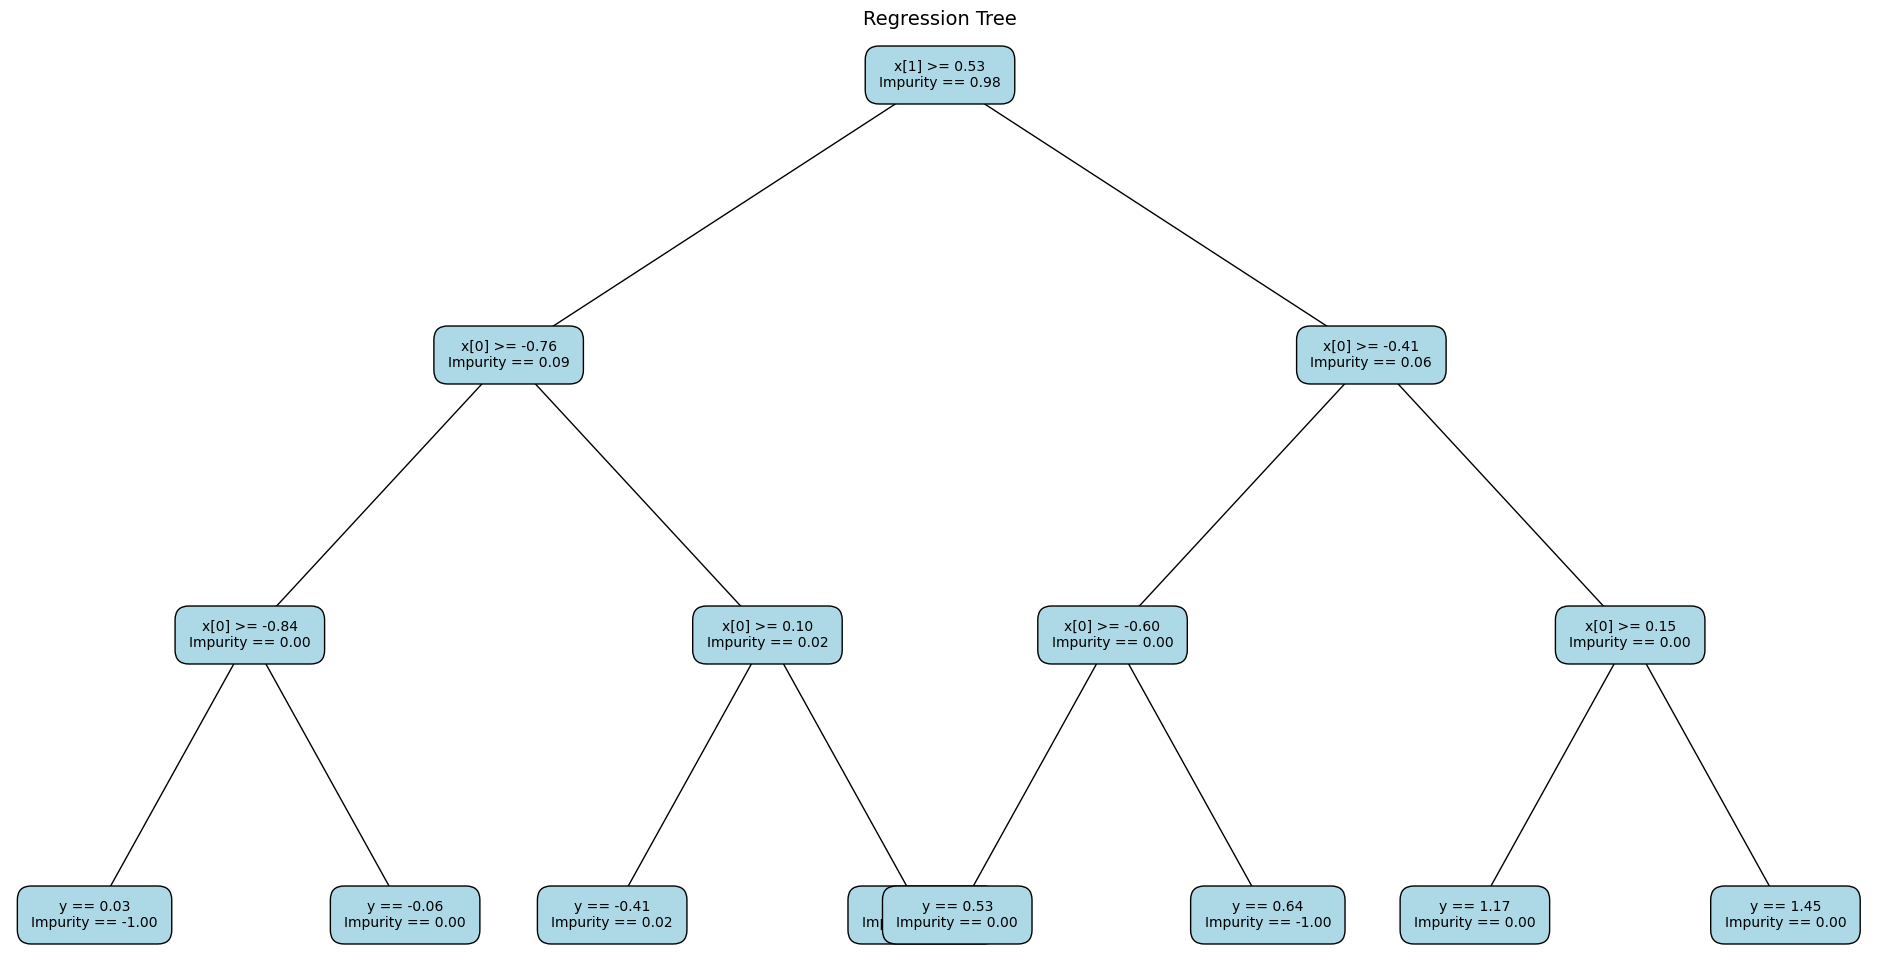

In [6]:
# training two different models for each dimension
model1 = RegressionTree(leaf_size=8)
model1.fit(X, y[:, 0])
model1.bst.plot_tree()

model2 = RegressionTree(max_height=3)
model2.fit(X, y[:, 1])
model2.bst.plot_tree()

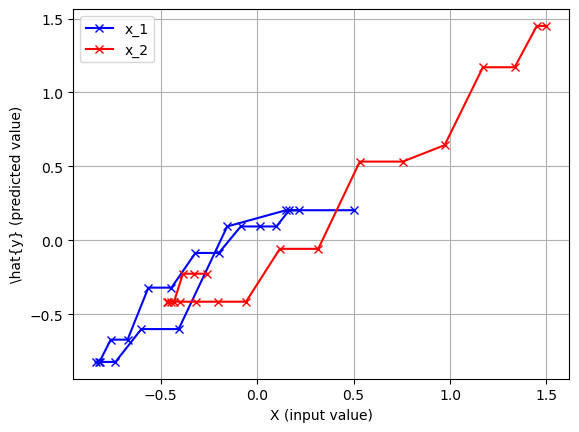

In [7]:
# plotting predictions vs. target values
predictions_x1 = []
predictions_x2 = []

for x in X:
    predictions_x1.append(model1.predict(x))
    predictions_x2.append(model2.predict(x))

plt.plot(X[:, 0], predictions_x1, '-xb')
plt.plot(X[:, 1], predictions_x2, '-xr')
plt.xlabel('X (input value)')
plt.ylabel('\\hat{y} (predicted value)')
plt.legend(['x_1', 'x_2'])
plt.grid(True)
plt.show()

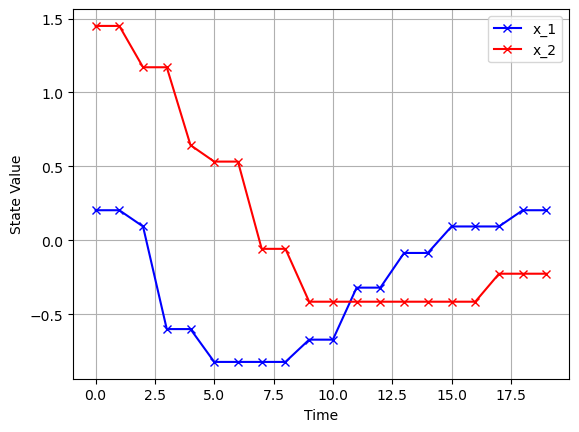

In [8]:
# plots vs. time
plt.plot(T, predictions_x1, '-xb')
plt.plot(T, predictions_x2, '-xr')
plt.xlabel('Time')
plt.ylabel('State Value')
plt.legend(['x_1', 'x_2'])
plt.grid(True)
plt.show()

## Full code for task 4 (part 1)

(0.017414853720043828, 0.015529566565322917)


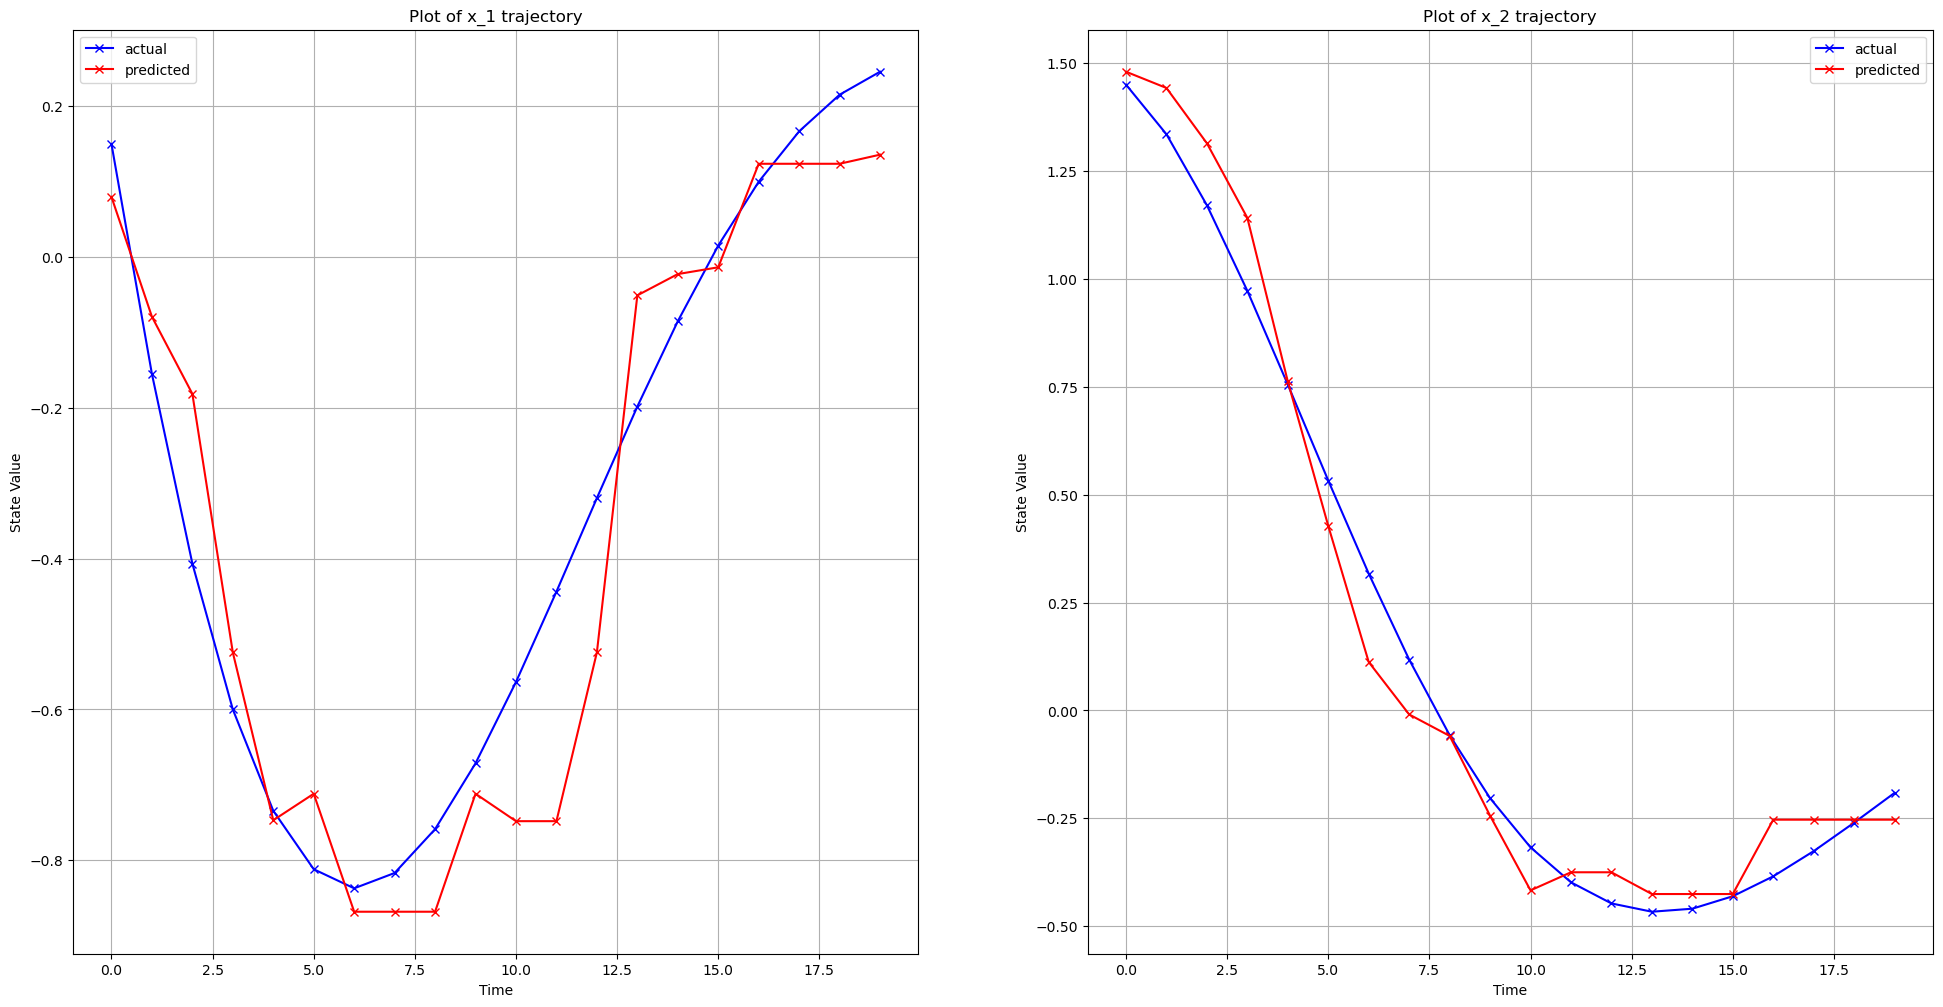

[[ 1.00000000e+00 -1.00000000e+00  6.95542061e+00  3.75270844e-04]
 [ 1.00000000e+00  2.00000000e+00  2.02537284e+00  1.70427799e-01]
 [ 1.00000000e+00  4.00000000e+00  2.02537284e+00  1.71468496e-01]
 [ 1.00000000e+00  6.00000000e+00  2.02537284e+00  1.72591686e-01]
 [ 1.00000000e+00  8.00000000e+00  2.02537284e+00  1.81642294e-01]
 [ 1.00000000e+00  1.00000000e+01  2.02537284e+00  1.77258015e-01]
 [ 1.00000000e+00  1.20000000e+01  2.02537284e+00  1.77985907e-01]
 [ 1.00000000e+00  1.40000000e+01  2.02537284e+00  1.78913832e-01]
 [ 2.00000000e+00 -1.00000000e+00  6.95542061e+00  1.38044357e-04]
 [ 2.00000000e+00  2.00000000e+00  2.02537284e+00  1.80257797e-01]
 [ 2.00000000e+00  4.00000000e+00  7.12575947e-01  2.90928125e-01]
 [ 2.00000000e+00  6.00000000e+00  7.12575947e-01  3.14932823e-01]
 [ 2.00000000e+00  8.00000000e+00  7.12575947e-01  3.15240860e-01]
 [ 2.00000000e+00  1.00000000e+01  7.12575947e-01  3.16250086e-01]
 [ 2.00000000e+00  1.20000000e+01  7.12575947e-01  3.16863537e

In [6]:
import matplotlib.pyplot as plt
from task1 import *
from sklearn.model_selection import train_test_split
import time


def print_table(data, headers=None, padding=2):
    """
    Prints data as a formatted table.

    Args:
        data (list of lists): The data to be printed. Each inner list represents a row.
        headers (list, optional): A list of headers for the table. Defaults to None.
        padding (int, optional): The amount of padding to add around each cell. Defaults to 2.
    """

    # If headers are provided, add them to the data
    if headers:
        data_to_print = np.row_stack((headers, data))
    else:
        data_to_print = data

    # Calculate column widths
    col_widths = [0] * len(data_to_print[0])
    for row in data_to_print:
        for i, cell in enumerate(row):
            col_widths[i] = max(col_widths[i], len(str(cell)))

    # Add padding to column widths
    col_widths = [width + 2 * padding for width in col_widths]

    # Print the table
    for row in data_to_print:
        formatted_row = ""
        for i, cell in enumerate(row):
            formatted_row += str(cell).ljust(col_widths[i])
            if i + 1 == len(row):
                formatted_row += '\\\\'
            else:
                formatted_row += ' & '

        print(formatted_row)


def next_state(x_1, x_2):
    y1 = 0.9*x_1 - 0.2*x_2
    y2 = 0.2*x_1 + 0.9*x_2
    return np.column_stack((y1, y2))


def make_predictions(model1, model2, X):
    predictions_x1 = []
    predictions_x2 = []

    for x in X:
        predictions_x1.append(model1.predict(x))
        predictions_x2.append(model2.predict(x))

    return (predictions_x1, predictions_x2)


def compute_mse(y, x1_predictions, x2_predictions):
    y_hat = np.array([])
    y_hat = np.column_stack((x1_predictions, x2_predictions))
    x1_error = np.mean(np.square(y[:, 0] - y_hat[:, 0]))
    x2_error = np.mean(np.square(y[:, 1] - y_hat[:, 1]))
    return (x1_error, x2_error)

# Creating trajectory evaluation


def trajectory_eval(model1, model2):
    # Time steps
    T = np.arange(0, 20)

    # initial state
    x_k = np.array([0.5, 1.5])

    # creating an array of data
    # shape: (number of time steps (rows), number of entries in each row, dimension of each column (previous state and next state))
    X = np.zeros((T.size, 2, 2))

    for t in T:
        X[t, 0, :] = x_k
        # creating next state
        X[t, 1, :] = next_state(x_k[0], x_k[1])
        x_k = X[t, 1, :]

    y = X[:, 1]
    X = X[:, 0]

    predictions_x1, predictions_x2 = make_predictions(model1, model2, X)

    fig, axes = plt.subplots(1, 2, figsize=(
        24, 12))  # Adjust figsize as needed
    axes[0].plot(T, y[:, 0], '-xb')
    axes[0].plot(T, predictions_x1[:], '-xr')
    axes[0].set_xlabel('Time')
    axes[0].set_ylabel('State Value')
    axes[0].set_title('Plot of x_1 trajectory')
    axes[0].legend(['actual', 'predicted'])
    axes[0].grid(True)

    axes[1].plot(T, y[:, 1], '-xb')
    axes[1].plot(T, predictions_x2[:], '-xr')
    axes[1].set_xlabel('Time')
    axes[1].set_ylabel('State Value')
    axes[1].set_title('Plot of x_2 trajectory')
    axes[1].legend(['actual', 'predicted'])
    axes[1].grid(True)
    # plt.savefig(fname="task4a_x1_trajectory", dpi=300)
    plt.show()


def create_dataset(num_of_samples):
    # creating a dataset
    X = np.random.default_rng(1).uniform(
        low=-5, high=5,  size=(num_of_samples, 2))
    y = next_state(X[:, 0], X[:, 1])
    return (X, y)


def main():
    # Creating a training and testing dataset
    X, y = create_dataset(2_000)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1)

    # Training models
    # training two different models for each dimension and without hyperparameters
    model1 = RegressionTree()
    model1.fit(X_train, y_train[:, 0])
    # model1.bst.plot_tree()

    model2 = RegressionTree()
    model2.fit(X_train, y_train[:, 1])
    # model2.bst.plot_tree()

    # printing testing error
    model1_predictions = []
    model2_predictions = []

    for x in X_test:
        model1_predictions.append(model1.predict(x))
        model2_predictions.append(model2.predict(x))
    print(compute_mse(y_test, model1_predictions, model2_predictions))

    # Evaluating performance on a trajectory
    trajectory_eval(model1, model2)

    # Finding optimal parameters
    leaf_sizes = [-1, 2, 4, 6, 8, 10, 12, 14]
    max_heights = [1, 2, 3, 4, 5,  6,  7,  8]
    max_heights_table = []
    leaf_sizes_table = []
    model1_mses = []
    model2_mses = []
    model1_training_time = []
    model2_training_time = []

    for max_height in max_heights:
        for leaf_size in leaf_sizes:
            max_heights_table.append(max_height)
            leaf_sizes_table.append(leaf_size)
            model1 = RegressionTree(leaf_size=leaf_size, max_height=max_height)
            model2 = RegressionTree(leaf_size=leaf_size, max_height=max_height)

            # training two trees and saving the time cost
            model1_start = time.time()
            model1.fit(X, y[:, 0])
            model1_end = time.time()
            model1_training_time.append(model1_end - model1_start)

            model2_start = time.time()
            model2.fit(X, y[:, 1])
            model2_end = time.time()
            model2_training_time.append(model2_end - model2_start)

            model1_predictions, model2_predictions = make_predictions(
                model1, model2, X)

            model1_mse, model2_mse = compute_mse(
                y, model1_predictions, model2_predictions)
            model1_mses.append(model1_mse)
            model2_mses.append(model2_mse)

    headers = ["Max Height", "Leaf Size", "MSE", "Time Cost"]
    x1_data = np.array([max_heights_table, leaf_sizes_table,
                       model1_mses, model1_training_time]).T
    x2_data = np.array([max_heights_table, leaf_sizes_table,
                       model2_mses, model2_training_time]).T

    print(x1_data)


if __name__ == '__main__':
    main()

## Full code for task 4 (part 2)

MSE: (0.10116830188634296, 0.27192725150822544)


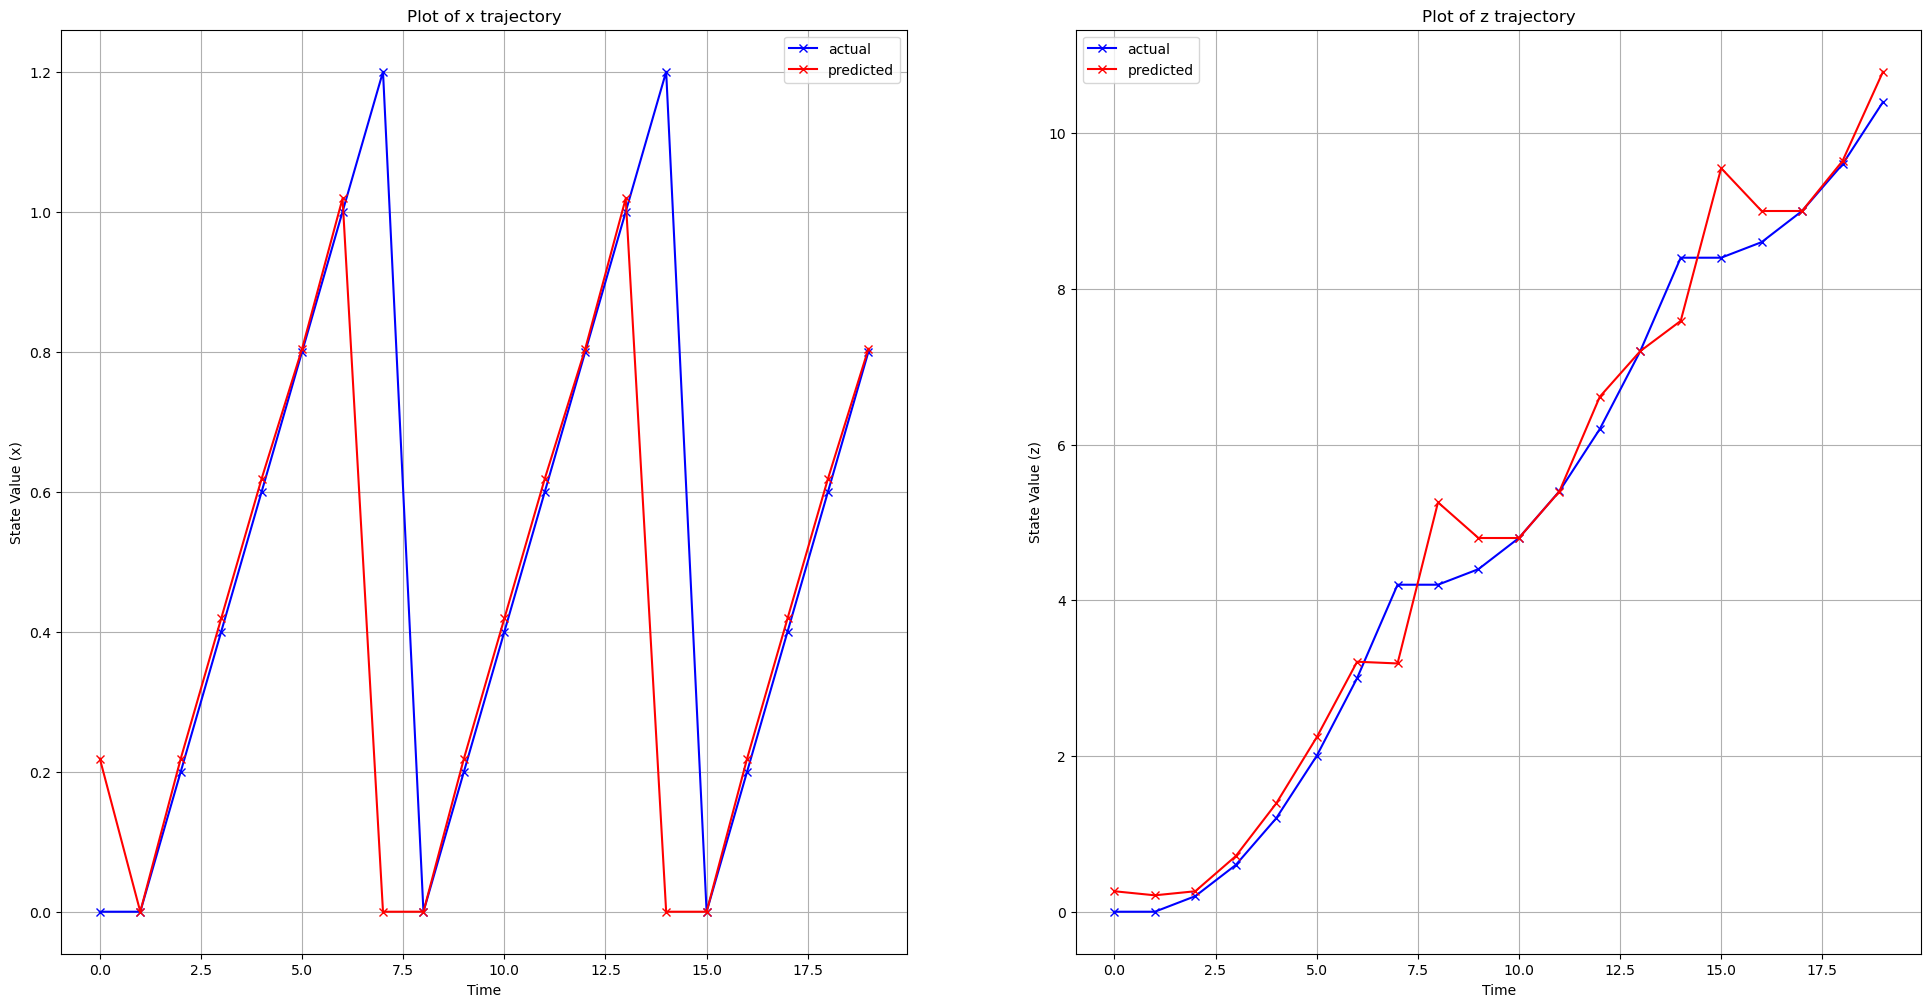

In [1]:
from task1 import RegressionTree
import numpy as np
from sklearn.model_selection import train_test_split
from task4a import make_predictions, compute_mse
import matplotlib.pyplot as plt

# Functions


def func(x):
    """
    This function is pretty interesting. Since the state of the program
    is defined as the value of its variables (x and z in this case),
    we can say that the next state of the program only depends on x.
    That is, both x_{k+1} and z_{k+1} depend on x_k.

    This mostly serves as a reference.
    """
    z = 0
    for _ in range(20):
        if x > 1:
            x = 0
        else:
            x += 0.2
        z = z + x

    return (x, z)


def create_dataset(num_of_samples):
    x_values = np.random.default_rng(1).uniform(
        low=-3, high=3,  size=(num_of_samples,))
    X = np.zeros((20*num_of_samples, 2))
    y = np.zeros((20*num_of_samples, 2))

    # this for loop will compute
    # the next state based on x and z
    for i, x in enumerate(x_values):
        x_k = x
        z_k = 0
        for j in range(20):
            # add the current state as an input
            X[20*i+j, 0] = x_k
            X[20*i+j, 1] = z_k

            # compute the next state
            if x_k > 1:
                x_k = 0
            else:
                x_k += 0.2
            z_k += x_k

            # add the next state as a label
            y[20*i+j, 0] = x_k
            y[20*i+j, 1] = z_k

    return (X, y)


def trajectory_eval(model1, model2):
    # initial state
    x_k = 2
    z_k = 0

    # array of previous states (x, z)
    X = np.zeros((20, 2))
    # array of next state (x, z)
    y = np.zeros((20, 2))

    for i in range(1, 20):
        X[i, 0] = x_k
        X[i, 1] = z_k

        # compute the next state
        if x_k > 1:
            x_k = 0
        else:
            x_k += 0.2
        z_k += x_k

        y[i, 0] = x_k
        y[i, 1] = z_k

    predictions_x1, predictions_x2 = make_predictions(model1, model2, X)

    fig, axes = plt.subplots(1, 2, figsize=(24, 12))

    # Plotting actual trajectory
    axes[0].plot(range(20), y[:, 0], '-xb')
    axes[0].plot(range(20), predictions_x1[:], '-xr')
    axes[0].set_xlabel('Time')
    axes[0].set_ylabel('State Value (x)')
    axes[0].set_title('Plot of x trajectory')
    axes[0].legend(['actual', 'predicted'])
    axes[0].grid(True)

    # Plotting predicted trajectory
    axes[1].plot(range(20), y[:, 1], '-xb')
    axes[1].plot(range(20), predictions_x2[:], '-xr')
    axes[1].set_xlabel('Time')
    axes[1].set_ylabel('State Value (z)')
    axes[1].set_title('Plot of z trajectory')
    axes[1].legend(['actual', 'predicted'])
    axes[1].grid(True)
    # plt.savefig(fname="task4b_trajectories", dpi=300)
    plt.show()


# Generating training and testing data
X, y = create_dataset(100)
# print(X)
# print(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

# Training two models and evaluating their performance
model1 = RegressionTree()
model2 = RegressionTree()

model1.fit(X_train, y_train[:, 0])
model2.fit(X_train, y_train[:, 1])

x_predictions, z_predictions = make_predictions(model1, model2, X_test)

print(f'MSE: {compute_mse(y_test, x_predictions, z_predictions)}')


# Plotting trajectories
trajectory_eval(model1, model2)